In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
df_m = pd.read_csv('data/speeddating modified.csv')
df_p = pd.read_csv('data/speeddating personal.csv')

In [27]:
df_p

,Unnamed: 0,id,gender,age,race,importance_same_race,importance_same_religion,field,attractive_important,sincere_important,...,concerts,music,shopping,yoga,nb_match,nb_match_moyen,nb_decision_o,nb_decision_o_moyen,mean_note_moyenne_o,note_moyenne
0,0,0,female,21.0,asian/pacific islander/asian-american,2.0,4.0,law,15.0,20.0,...,10.0,9.0,8.0,1.0,4,0.400000,5,0.500000,6.508840,5.79
1,1,1,female,24.0,european/caucasian-american,2.0,5.0,law,45.0,5.0,...,7.0,8.0,3.0,1.0,2,0.200000,6,0.600000,6.729390,6.54
2,2,2,female,25.0,european/caucasian-american,8.0,4.0,economics,35.0,10.0,...,7.0,5.0,8.0,7.0,0,0.000000,5,0.500000,5.912922,8.11
3,3,3,female,23.0,european/caucasian-american,1.0,1.0,law,20.0,20.0,...,8.0,7.0,1.0,8.0,2,0.200000,6,0.600000,6.439950,6.09
4,4,4,female,21.0,european/caucasian-american,8.0,1.0,law,20.0,5.0,...,3.0,7.0,8.0,3.0,2,0.200000,3,0.300000,5.544960,4.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,533,533,male,30.0,european/caucasian-american,8.0,8.0,business,40.0,10.0,...,7.0,10.0,4.0,1.0,5,0.227273,10,0.454545,5.431000,8.00
534,534,534,male,28.0,european/caucasian-american,2.0,3.0,general management/finance,20.0,20.0,...,10.0,10.0,8.0,2.0,5,0.227273,10,0.454545,5.440000,5.81
535,535,535,male,30.0,european/caucasian-american,5.0,6.0,mba,30.0,3.0,...,4.0,6.0,6.0,3.0,4,0.181818,6,0.272727,4.902727,5.11
536,536,536,male,27.0,black/african american,2.0,1.0,business,40.0,20.0,...,7.0,7.0,7.0,1.0,2,0.090909,10,0.454545,5.438095,5.64


In [4]:
df2 = df_p[['attractive','nb_match_moyen']].groupby('attractive').mean()
df3 = df_p[['intelligence','nb_match_moyen']].groupby('intelligence').mean()
df4 = df_p[['sincere','nb_match_moyen']].groupby('sincere').mean()
df5 = df_p[['funny','nb_match_moyen']].groupby('funny').mean()
df6 = df_p[['ambition','nb_match_moyen']].groupby('ambition').mean()

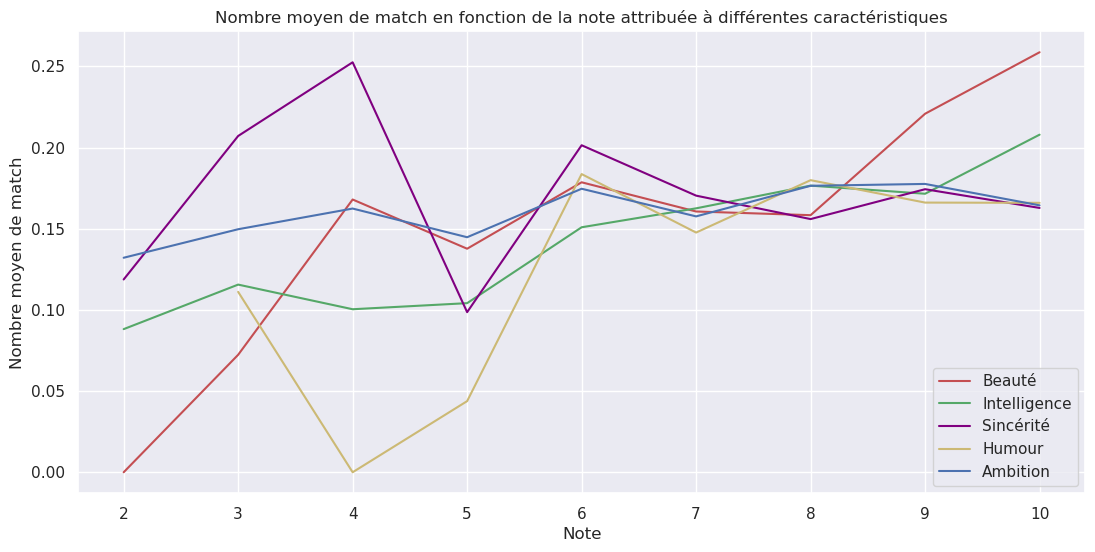

In [5]:
sns.set(rc={'figure.figsize':(13,6)})

ax = df2.plot(ylabel = 'Nombre moyen de match', label = 'Attractive', color = 'r')
ax2 = df3.plot(ax = ax, color = 'g')
ax3 = df4.plot(ax = ax2, color = 'purple')
ax4 = df5.plot(ax = ax3, color = 'y')
df6.plot(ax = ax4, legend = True, xlabel = 'Note', title = 'Nombre moyen de match en fonction de la note attribuée à différentes caractéristiques')
ax.legend(['Beauté', 'Intelligence', 'Sincérité', 'Humour', 'Ambition'])

In [8]:
#De manière générale, on constate que pour la beauté et l'humour, les valeurs extrémales sont très importantes (ie les personnes très belles ont beaucoup plus de match que la moyenne
#et les personnes très moches et pas drôles ont beaucoup moins de match que la moyenne), alors que pour l'intelligence, la sincérité et l'ambition, les valeurs sont beaucoup
#plus homogènes, et ces critères semblent avoir moins d'influence

In [6]:
df_1 = df_m[['interests_correlate', 'match']].groupby(df_m['interests_correlate'].round(1)).mean()

#Je regroupe les dates où la correlation des intérêts est la même à 0.1 près, et je fais la moyenne des match ce qui donne la probabilité que dans un tel date il y ait un match

In [7]:
df_2 = df_1.tail(-5)
df_2.drop(df_2.tail(1).index,inplace=True)
df_2
#Je retire les valeurs extrêmales parceque visiblement elles ne sont pas significative (pas assez de dates avec ces correlations extrèmes)

/tmp/ipykernel_1466/490733702.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.drop(df_2.tail(1).index,inplace=True)


,interests_correlate,match
interests_correlate,,
-0.3,-0.298191,0.117021
-0.2,-0.194948,0.165505
-0.1,-0.094943,0.162214
-0.0,0.000811,0.146489
0.1,0.102839,0.150513
0.2,0.199928,0.152107
0.3,0.300831,0.180710
0.4,0.399738,0.152371
0.5,0.500437,0.190728


<AxesSubplot: title={'center': 'Probabilité de match lors de la rencontre en fonction de la correlation des intérêts'}, xlabel='Correlation des intérêts', ylabel='Probabilité de "match" '>

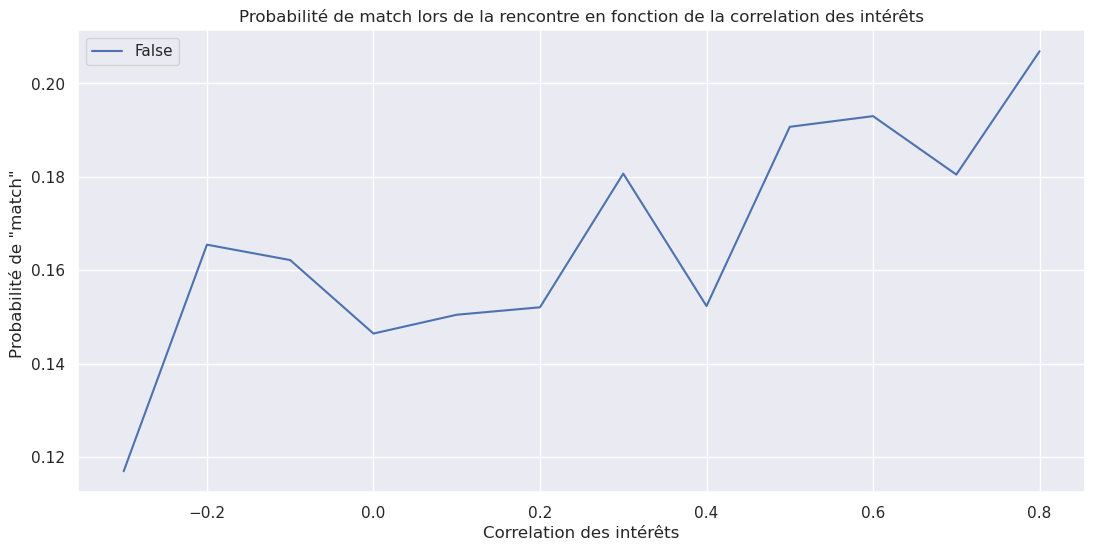

In [8]:
df_2.plot(y = 'match', xlabel = 'Correlation des intérêts', label =False , ylabel = 'Probabilité de "match" ', title = 'Probabilité de match lors de la rencontre en fonction de la correlation des intérêts')

In [12]:
#Le résultat n'est pas surprenant, mais on peut quand même dire des choses : par exemple, la différence entre n'avoir rien en commun (correlation = 0) et
# une correlation très forte (= 0.8) fait passer la probabilité de match de 0.15 à 0.21, soit la même différence entre être un 4/10 en beauté et un 
# 9/10 selon le graphique précédent.

In [9]:
df_m['diff_note_moy'] = df_m['note_moyenne_o'] - df_m['note_moyenne']

In [10]:
df_m

,Unnamed: 0,id,has_null,wave,gender,age,age_o,d_age,d_d_age,race,...,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match,note_moyenne,note_moyenne_o,diff_note_moy
0,0,0,0,1,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,...,6.0,[6-8],[5-6],0.0,1,0,0,5.79,6.90,1.11
1,1,0,0,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,...,5.0,[6-8],[5-6],1.0,1,0,0,5.79,7.00,1.21
2,2,0,1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,...,NaN,[6-8],[0-4],1.0,1,1,1,5.79,8.80,3.01
3,3,0,0,1,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,...,6.0,[6-8],[5-6],0.0,1,1,1,5.79,7.50,1.71
4,4,0,0,1,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,...,6.0,[6-8],[5-6],0.0,1,1,1,5.79,6.40,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8204,8204,537,1,21,male,25.0,26.0,1,[0-1],european/caucasian-american,...,5.0,[0-5],[5-6],0.0,0,1,0,6.99,3.40,-3.59
8205,8205,537,1,21,male,25.0,24.0,1,[0-1],european/caucasian-american,...,4.0,[0-5],[0-4],0.0,0,0,0,6.99,5.15,-1.84
8206,8206,537,1,21,male,25.0,29.0,4,[4-6],european/caucasian-american,...,5.0,[6-8],[5-6],0.0,0,0,0,6.99,1.90,-5.09
8207,8207,537,1,21,male,25.0,22.0,3,[2-3],european/caucasian-american,...,5.0,[0-5],[5-6],0.0,0,1,0,6.99,4.30,-2.69


In [11]:
df_3 = df_m[['diff_note_moy', 'match']].groupby(df_m['diff_note_moy'].round(1)).mean()

In [12]:
df_3 = df_3[df_3['diff_note_moy']< 3]
df_3 = df_3[df_3['diff_note_moy']> -4]
#je coupe encore les valeurs extrêmales, pas représentatives

<AxesSubplot: xlabel="Différence entre la note attribuée par l'autre personne et celle auto-attribuée", ylabel='Probabilité de match'>

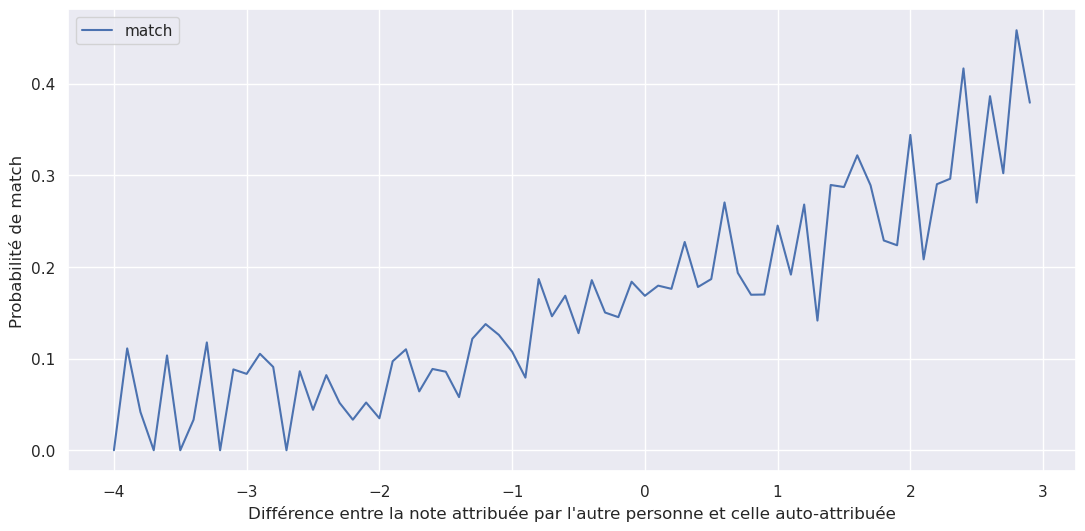

In [13]:
df_3.plot(y = 'match', xlabel = "Différence entre la note attribuée par l'autre personne et celle auto-attribuée", ylabel = 'Probabilité de match')

In [18]:
#Résultat intéressant et moins évident qu'il peux sembler : si je me met une note de 9 et que la fille dit que je suis un 8, certes elle m'a noté très haut, ce qui prédis un match
# mais la différence entre les notes est -1 et on voit ici que la proba de match est de 0.1. Il y a l'air d'y avoir une vrai correlation qui indique que les personnes plus modestes
# ont plus de chance de match que les personnes avec un ego

In [14]:
df_4 = df_m[['note_moyenne_o', 'match']].groupby(df_m['note_moyenne_o'].round(1)).mean()

In [15]:
df_5 = df_m[['note_moyenne', 'match']].groupby(df_m['note_moyenne'].round(1)).mean()

In [16]:
df_4

,note_moyenne_o,match
note_moyenne_o,,
0.0,0.000000,0.000000
0.8,0.822300,0.000000
0.9,0.893080,0.000000
1.0,0.962500,0.000000
1.4,1.425000,0.000000
...,...,...
9.6,9.610000,0.428571
9.7,9.700000,0.000000
9.8,9.811250,0.500000


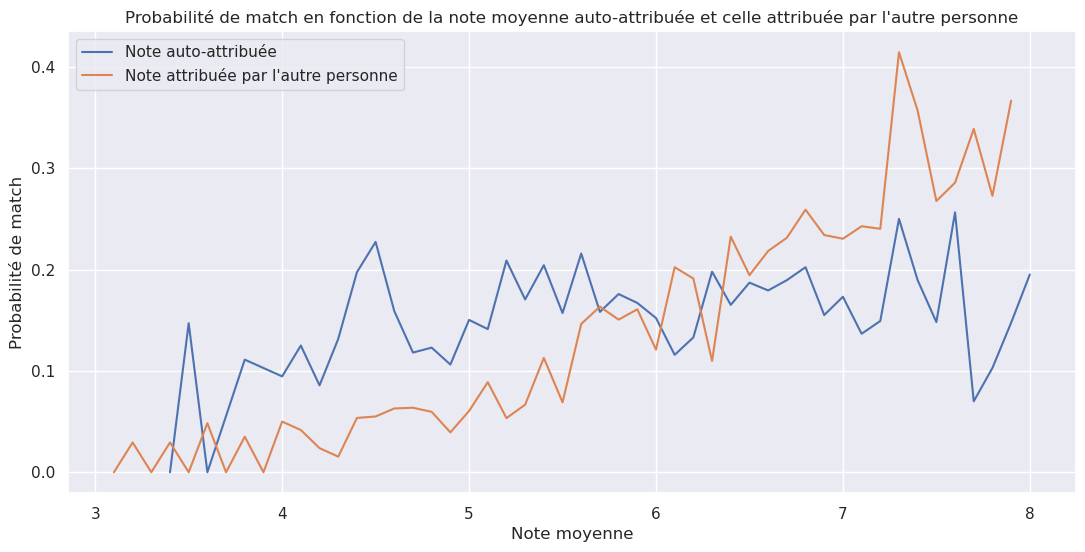

In [17]:
df_5 = df_5[df_5['note_moyenne']< 8]
df_4 = df_4[df_4['note_moyenne_o']< 8]
ax = df_5[df_5['note_moyenne'] > 3].plot(y = 'match', ylabel = 'Probabilité de match')

df_4[df_4['note_moyenne_o'] > 3].plot(y = 'match', ax =ax, xlabel = 'Note moyenne', title = "Probabilité de match en fonction de la note moyenne auto-attribuée et celle attribuée par l'autre personne")

ax.legend(['Note auto-attribuée',"Note attribuée par l'autre personne"])

In [23]:
#On voit que la note auto attribuée a l'air de pas avoir beaucoup d'importance comparée à la note attribuée par l'autre personne

In [33]:

df_7 = df_p[['field','nb_match_moyen']].groupby('field').mean()

In [29]:
df_7

,nb_match_moyen
field,
acting,0.000000
african-american studies/history,0.133333
american studies,0.111111
american studies [masters],0.187500
anthropology,0.211111
...,...
theory,0.400000
undergrad - gs,0.052632
urban planning,0.208333


<AxesSubplot: title={'center': 'Professions accordant le plus grand taux de match'}, xlabel='Profession', ylabel='Nombre moyen de match'>

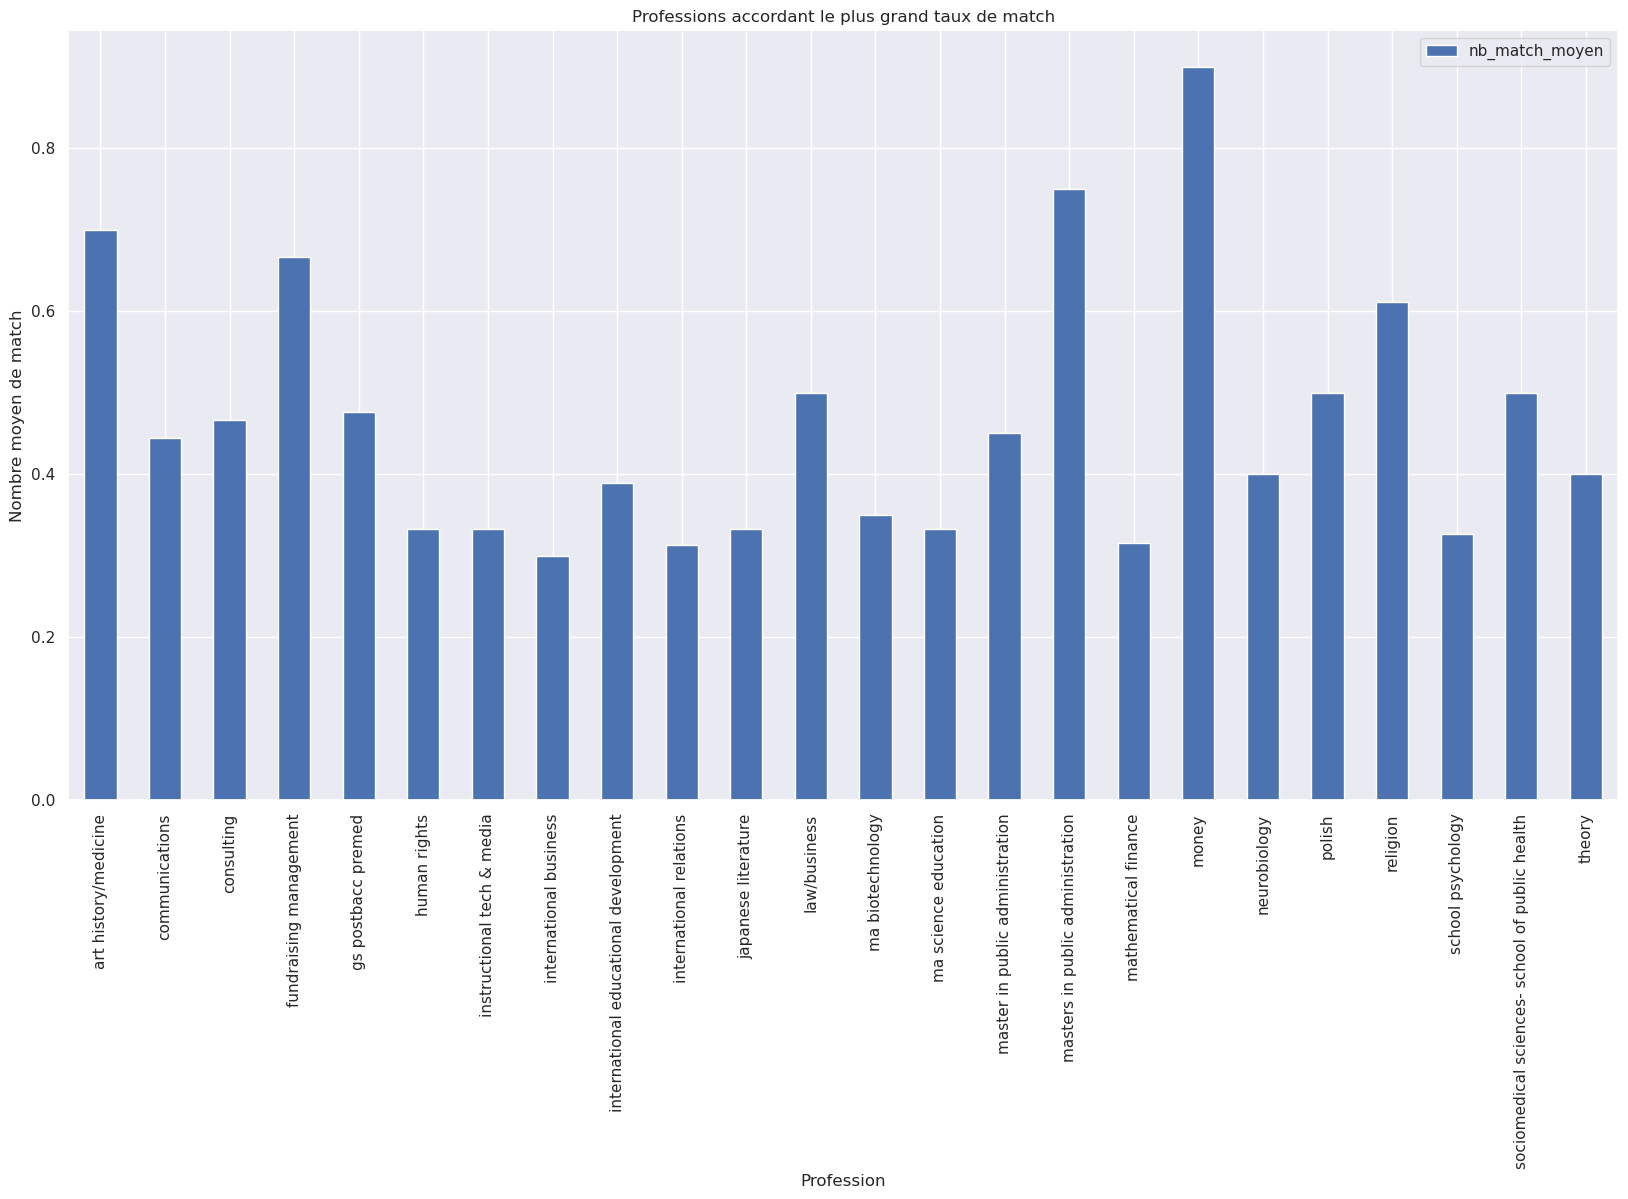

In [34]:
df_7[df_7['nb_match_moyen']>0.3].plot.bar(xlabel = 'Profession', ylabel = 'Nombre moyen de match', title = 'Professions accordant le plus grand taux de match')

In [21]:
df_8 = df_p[['attractive_important', 'sincere_important', 'intelligence_important', 'funny_important', 'ambition_important', 'shared_interests_important','nb_match_moyen']].groupby(df_p['nb_match_moyen'].round(1)).mean()

In [22]:
df_8 = df_8.drop(['nb_match_moyen'], axis = 1)
df_8

,attractive_important,sincere_important,intelligence_important,funny_important,ambition_important,shared_interests_important
nb_match_moyen,,,,,,
0.0,23.073077,17.910855,19.169060,16.868803,10.807863,12.264615
0.1,20.452976,18.272976,21.035893,16.820893,11.077917,12.595536
0.2,23.037090,16.569851,19.583955,17.862388,10.784403,12.237239
0.3,25.338462,16.079538,20.358154,17.719231,10.183846,10.475077
0.4,20.383437,17.573125,21.364687,19.265625,11.366250,9.736250
0.5,25.486667,14.581111,20.692222,19.256667,12.812222,6.060000
0.6,20.077143,18.208571,20.032857,21.032857,9.890000,10.758571
0.7,23.333333,16.666667,20.000000,18.333333,10.666667,11.000000
0.8,19.545000,11.590000,21.135000,29.090000,11.590000,7.045000


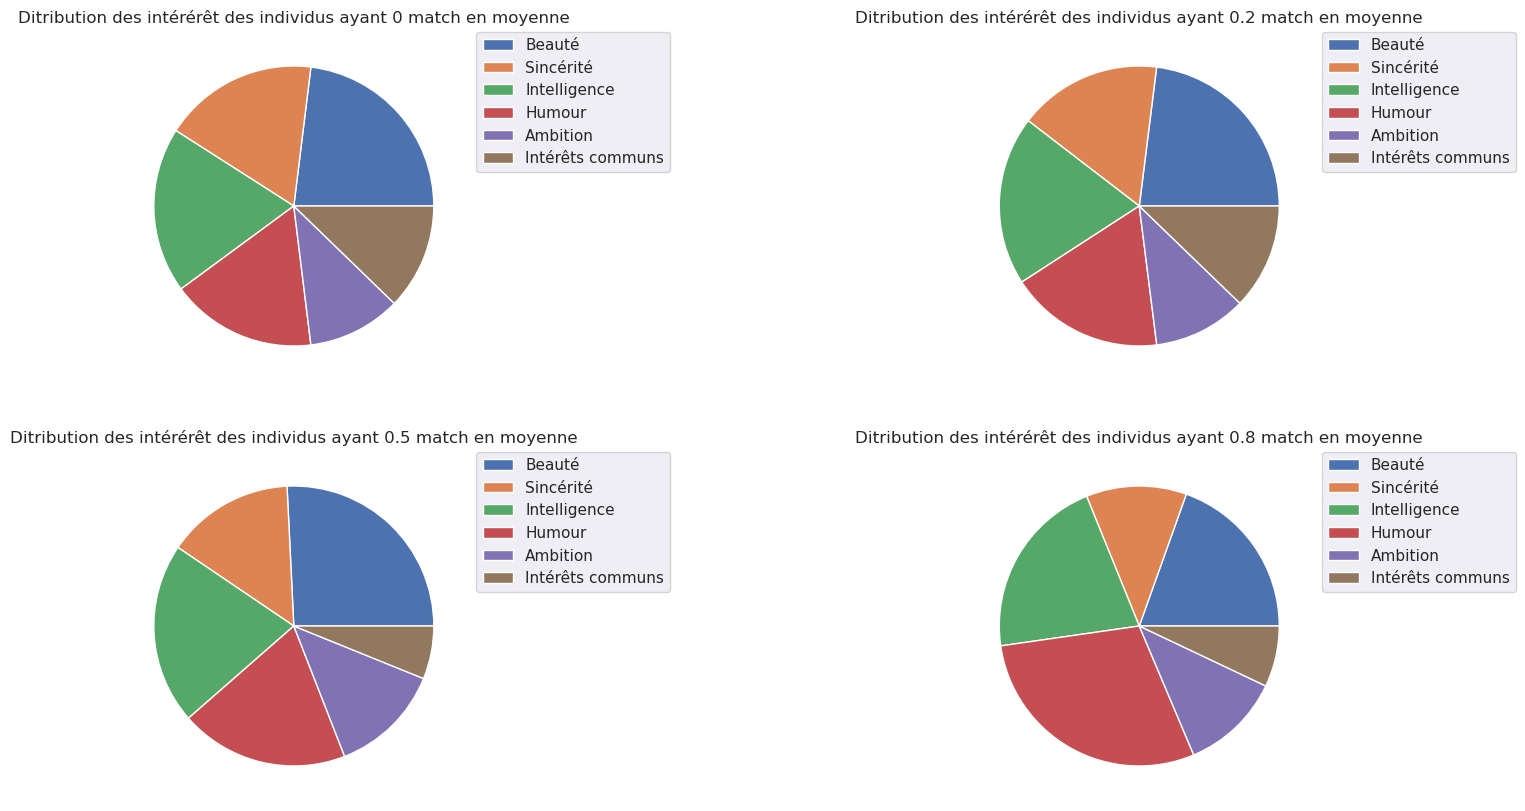

In [23]:
sns.set(rc={'figure.figsize':(20,10)})
fig, axes = plt.subplots(nrows=2, ncols=2)

ax = df_8.iloc[0,:].plot.pie(ax = axes[0,0], title = 'Ditribution des intérérêt des individus ayant 0 match en moyenne', legend = True, ylabel='', labeldistance=None)
ax.legend(['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêts communs'], bbox_to_anchor=(1, 1.02), loc='upper left')
ax = df_8.iloc[2,:].plot.pie(ax = axes[0,1], title = 'Ditribution des intérérêt des individus ayant 0.2 match en moyenne', legend = True, ylabel='', labeldistance=None)
ax.legend(['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêts communs'], bbox_to_anchor=(1, 1.02), loc='upper left')
ax = df_8.iloc[5,:].plot.pie(ax = axes[1,0], title = 'Ditribution des intérérêt des individus ayant 0.5 match en moyenne', legend = True, ylabel='', labeldistance=None)
ax.legend(['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêts communs'], bbox_to_anchor=(1, 1.02), loc='upper left')
ax = df_8.iloc[8,:].plot.pie(ax = axes[1,1], title = 'Ditribution des intérérêt des individus ayant 0.8 match en moyenne', legend = True, ylabel='', labeldistance=None)
ax.legend(['Beauté', 'Sincérité', 'Intelligence', 'Humour', 'Ambition', 'Intérêts communs'], bbox_to_anchor=(1, 1.02), loc='upper left')

In [35]:
#On constate pas mal de choses : l'humour devient de plus en plus important quand on a de plus en plus de match, alors que les intérêts en commun et la sincérité sont au contraire
#de moins en moins important. Comme avant, on constate aussi que visiblement